# 1. Import Libraries

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
import seaborn as sns

np.random.seed(42)
%matplotlib inline

# 2. Import training and validation data

In [23]:
X_train = pd.read_csv('../datasets/X_train.csv', header=None)
X_test = pd.read_csv('../datasets/X_test.csv', header=None)
y_train = pd.read_csv('../datasets/y_train.csv', header=None)
y_test = pd.read_csv('../datasets/y_test.csv', header=None)

In [24]:
X_train.shape

(1536, 229)

# 3. Scale the training and validation data

In [26]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# 4. Baseline Model Setup

### Instantiate the model

In [27]:
lr = LinearRegression()

### Fit the model

In [28]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Compare the scores on the training and test sets

In [29]:
lr.score(X_train_sc, y_train)

0.9301766153859533

In [30]:
lr.score(X_test_sc, y_test)

-2.2268209258116252e+20

In [31]:
print('RMSE = ', mean_squared_error(y_test, lr.predict(X_test_sc))**0.5)

RMSE =  1175106488111897.5


###  Align  and rename columns  for the $\beta$ coefficients

In [32]:
with open('../assets/columns_1544153112.pkl', 'rb') as f:
    columns = pickle.load(f)

In [33]:
betas = pd.DataFrame(lr.coef_, columns=columns).T

In [34]:
betas.columns = ['weights']

In [35]:
betas['abs_w'] = betas.weights.abs()

### Assign  $\beta_0$ value

In [36]:
beta_0 = lr.intercept_[0]

# 5. Baseline model test result

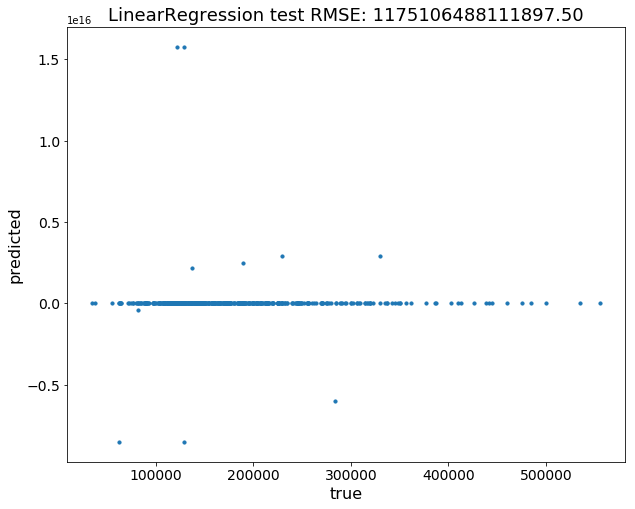

In [37]:
plt.figure(figsize=(10,8))
plt.title(f'LinearRegression test RMSE: {mean_squared_error(y_test, lr.predict(X_test_sc)) ** .5:.2f}',fontsize=18)
plt.scatter(y_test, lr.predict(X_test_sc),s=10)
plt.ylabel('predicted',fontsize=16)
plt.xlabel('true',fontsize=16)
#plt.plot([0, 500000], [0, 500000], color='r',label='Actual')
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

## Interpreting coefficients

In [38]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(12)

In [39]:
labels = weights.sort_values(ascending=False).index

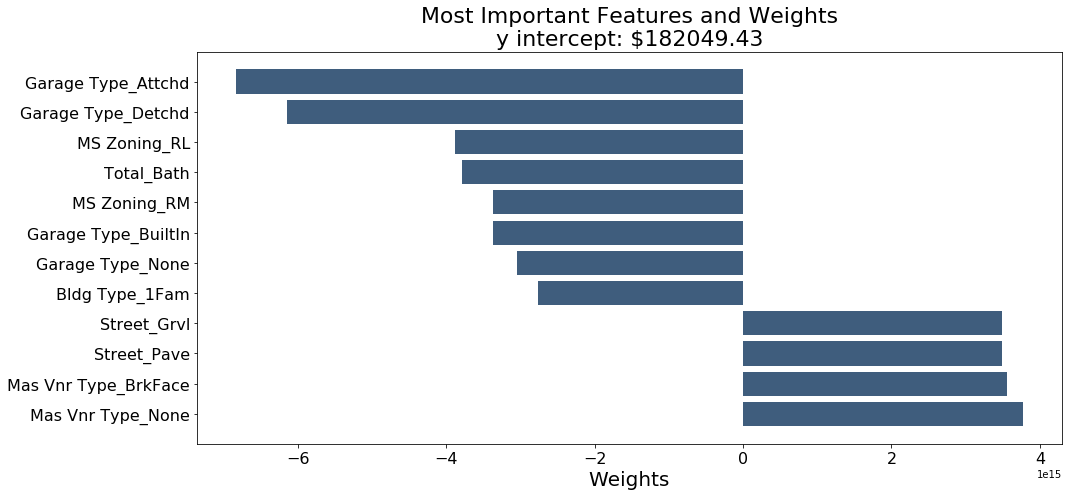

In [40]:
plt.figure(figsize=(15,7))
plt.barh(labels, weights.sort_values(ascending=False), color="#3F5D7D")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Weights', fontsize=20)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=22)
plt.tight_layout()

With this baseline model, it is unlikely that these huge weights represent a good model. In addition, the RMSE is huge and R^2 is negative value which indicate that the trained model is totally failed to predict the unseen values.